<div align="center">

Universidad de los Andes  
Facultad de Ingeniería  
Departamento de Ingeniería de Sistemas y Computación  

<br><br><br><br>

<p style="font-size:22px; font-weight:bold;">
PROYECTO DE GRADO
</p>

<br><br><br><br>

<p style="font-size:18px; line-height:1.4;">
<strong>
MÉTODOS DE <i>CLUSTERING</i> BASADOS EN <i>DEEP LEARNING</i> APLICADOS EN EL ANÁLISIS<br>
BIOLÓGICO DE LA MICROBIOTA INTESTINAL<br>
</strong>
</p>

<br><br><br><br>

Autor: Juan Felipe Lancheros Carrillo  
Código de estudiante: 202211004

<br><br><br><br>

Asesora: María del Pilar Villamil Giraldo

<br><br><br><br>

Bogotá, Colombia  
2025

</div>

---

## Referencias
* De La Cuesta-Zuluaga, J., Corrales-Agudelo, V., Velásquez-Mejía, E. P., Carmona, J. A., Abad, J. M., & Escobar, J. S. (2018). Gut microbiota is associated with obesity and cardiometabolic disease in a population in the midst of Westernization. Scientific Reports, 8(1), 11356. https://doi.org/10.1038/s41598-018-29687-x
* jsescobar. (2018). westernization. GitHub. https://github.com/jsescobar/westernization
---

## Verificación de las versiones de las librerías

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import re

print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Regex version: {re.__version__}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas version: 2.2.2
Numpy version: 2.0.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2
Regex version: 2.2.1


## 0. Lectura de archivos

In [3]:
df_meta = pd.read_csv("microbio_selected.meta", sep="\\t", index_col=0)
df_meta

/tmp/ipython-input-1876854642.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_meta = pd.read_csv("microbio_selected.meta", sep="\\t", index_col=0)


,city,sex,age,age_range,HDL,LDL,cholesterol,triglycerides,hsCRP,glucose,...,waist,medicament,fiber,per_protein,per_animal_protein,per_total_fat,per_saturated_fat,per_monoinsaturated_fat,per_polyunsaturated_fat,per_carbohydrates
ID,,,,,,,,,,,,,,,,,,,,,
MI_001_H,Medellin,Male,36,18_40,38,93,170,195,"1,71",86,...,"97,6",No,19,"16,15","60,53","28,4","11,01","9,88","4,82","55,47"
MI_002_H,Medellin,Female,40,18_40,52,130,202,100,"0,32",87,...,"89,3",No,13,"13,77","66,88","29,74","11,61","10,35","6,55","56,1"
MI_003_H,Medellin,Male,53,41_62,51,119,185,76,"1,84",85,...,"92,8",No,13,"14,57","64,75","24,2","9,48","8,1","4,84","61,37"
MI_004_H,Medellin,Male,58,41_62,59,120,199,99,"0,86",96,...,"84,7",Yes,16,"19,17","65,78","28,72","11,6","10,63","5,03","51,28"
MI_005_H,Medellin,Female,44,41_62,73,63,159,114,"0,43",64,...,"73,3",Yes,21,"13,86","59,4","28,4","9,91","9,66","6,92","57,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MI_455_H,Cali,Male,60,41_62,28,82,188,389,"1,6",81,...,"126,8",Yes,25,"16,39","59,8","28,43","10,02","10,21","6,04","55,18"
MI_456_H,Cali,Female,46,41_62,60,150,234,121,"1,2",87,...,"82,2",Yes,16,"14,2","60,32","27,67","11,65","9,3","4,9","58,02"
MI_458_H1,Cali,Male,40,18_40,51,78,186,282,"3,1",91,...,"107,6",Yes,17,"17,88","65,08","30,62","11,61","11,44","5,8","51,09"


In [4]:
df_otus = pd.read_csv("microbio_selected.otus", sep="\\t", index_col=0)
df_otus

/tmp/ipython-input-25913847.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_otus = pd.read_csv("microbio_selected.otus", sep="\\t", index_col=0)


,Otu00001,Otu00002,Otu00003,Otu00004,Otu00005,Otu00006,Otu00007,Otu00008,Otu00009,Otu00010,...,Otu04757,Otu04758,Otu04759,Otu04760,Otu04761,Otu04762,Otu04763,Otu04764,Otu04765,Otu04766
samples,,,,,,,,,,,,,,,,,,,,,
MI_001_H,354,817,50,31,448,547,727,353,2,674,...,0,0,0,0,0,0,0,0,0,0
MI_002_H,168,9,131,3005,68,10187,570,2006,104,67,...,0,0,0,0,0,0,0,0,0,0
MI_003_H,19,174,6211,79,1063,0,6077,1852,1471,257,...,0,0,0,0,0,0,0,0,0,0
MI_004_H,264,1816,159,16,110,4,12,206,0,382,...,0,0,0,0,0,0,0,0,0,0
MI_005_H,0,2,0,12,598,39,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MI_455_H,187,1270,646,29983,100,186,4,9,6,1,...,0,0,0,0,0,0,0,0,0,0
MI_456_H,418,1512,198,20,1620,198,575,7,3,90,...,0,0,0,0,0,0,0,0,0,0
MI_458_H1,189,3443,130,7428,375,13,28,82,2217,262,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_taxonomy = pd.read_csv("microbio_selected.taxonomy", sep="\\t", index_col=0)
df_taxonomy

/tmp/ipython-input-1176945655.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_taxonomy = pd.read_csv("microbio_selected.taxonomy", sep="\\t", index_col=0)


,Size,Taxonomy
OTU,,
Otu00001,136589,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...
Otu00002,1139018,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...
Otu00003,452087,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...
Otu00004,1182065,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
Otu00005,265091,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...
...,...,...
Otu04762,2,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...
Otu04763,2,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...
Otu04764,2,k__Bacteria;p__Actinobacteria;c__Actinobacteri...


## 1. Metadatos

### 1.1. Perfilamiento

In [6]:
df_meta.shape

print(f"{df_meta.shape[0]} filas y {df_meta.shape[1]} columnas")

446 filas y 31 columnas


In [7]:
print(df_meta.sample(n=1))

                 city     sex  age age_range  HDL LDL  cholesterol  \
ID                                                                   
MI_338_H  Bucaramanga  Female   31     18_40   32  98          141   

          triglycerides hsCRP  glucose  ...  waist medicament fiber  \
ID                                      ...                           
MI_338_H             92   5,6      110  ...  105,7         No    18   

         per_protein per_animal_protein per_total_fat  per_saturated_fat  \
ID                                                                         
MI_338_H       15,06              57,04         31,87              12,82   

          per_monoinsaturated_fat per_polyunsaturated_fat per_carbohydrates  
ID                                                                           
MI_338_H                    10,83                    6,26             52,75  

[1 rows x 31 columns]


In [8]:
df_meta.dtypes

,0
city,object
sex,object
age,int64
age_range,object
HDL,int64
LDL,object
cholesterol,int64
triglycerides,int64
hsCRP,object
glucose,int64


In [9]:
df_meta.describe()

,age,HDL,cholesterol,triglycerides,glucose,systolic_bp,diastolic_bp,fiber
count,446.000000,446.000000,446.000000,446.000000,446.000000,445.000000,446.000000,446.000000
mean,40.735426,46.029148,185.838565,143.829596,89.394619,124.474157,80.331839,17.686099
std,11.098009,13.565871,34.868368,98.785081,21.191293,18.603918,12.305191,5.059212
min,18.000000,11.000000,67.000000,28.000000,64.000000,76.000000,50.000000,7.000000
25%,32.000000,37.000000,163.000000,84.250000,81.000000,111.000000,71.000000,14.000000
50%,41.000000,44.000000,184.000000,118.000000,86.000000,123.000000,80.000000,17.000000
75%,50.000000,53.000000,207.750000,174.000000,92.000000,135.000000,88.000000,20.000000
max,62.000000,134.000000,302.000000,1090.000000,335.000000,204.000000,126.000000,44.000000


Index(['Medellin', 'Barranquilla', 'Cali', 'Bogota', 'Bucaramanga'], dtype='object', name='city') [22.64573991 20.1793722  20.1793722  19.28251121 17.71300448]
Index(['Female', 'Male'], dtype='object', name='sex') [51.79372197 48.20627803]
Index(['41_62', '18_40'], dtype='object', name='age_range') [53.13901345 46.86098655]


/tmp/ipython-input-2579754016.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_percentages.index, y=value_percentages.values, ax=ax, palette='viridis')
/tmp/ipython-input-2579754016.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_percentages.index, y=value_percentages.values, ax=ax, palette='viridis')
/tmp/ipython-input-2579754016.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_percentages.index, y=value_percentages.values, ax=ax, palette='viridis')


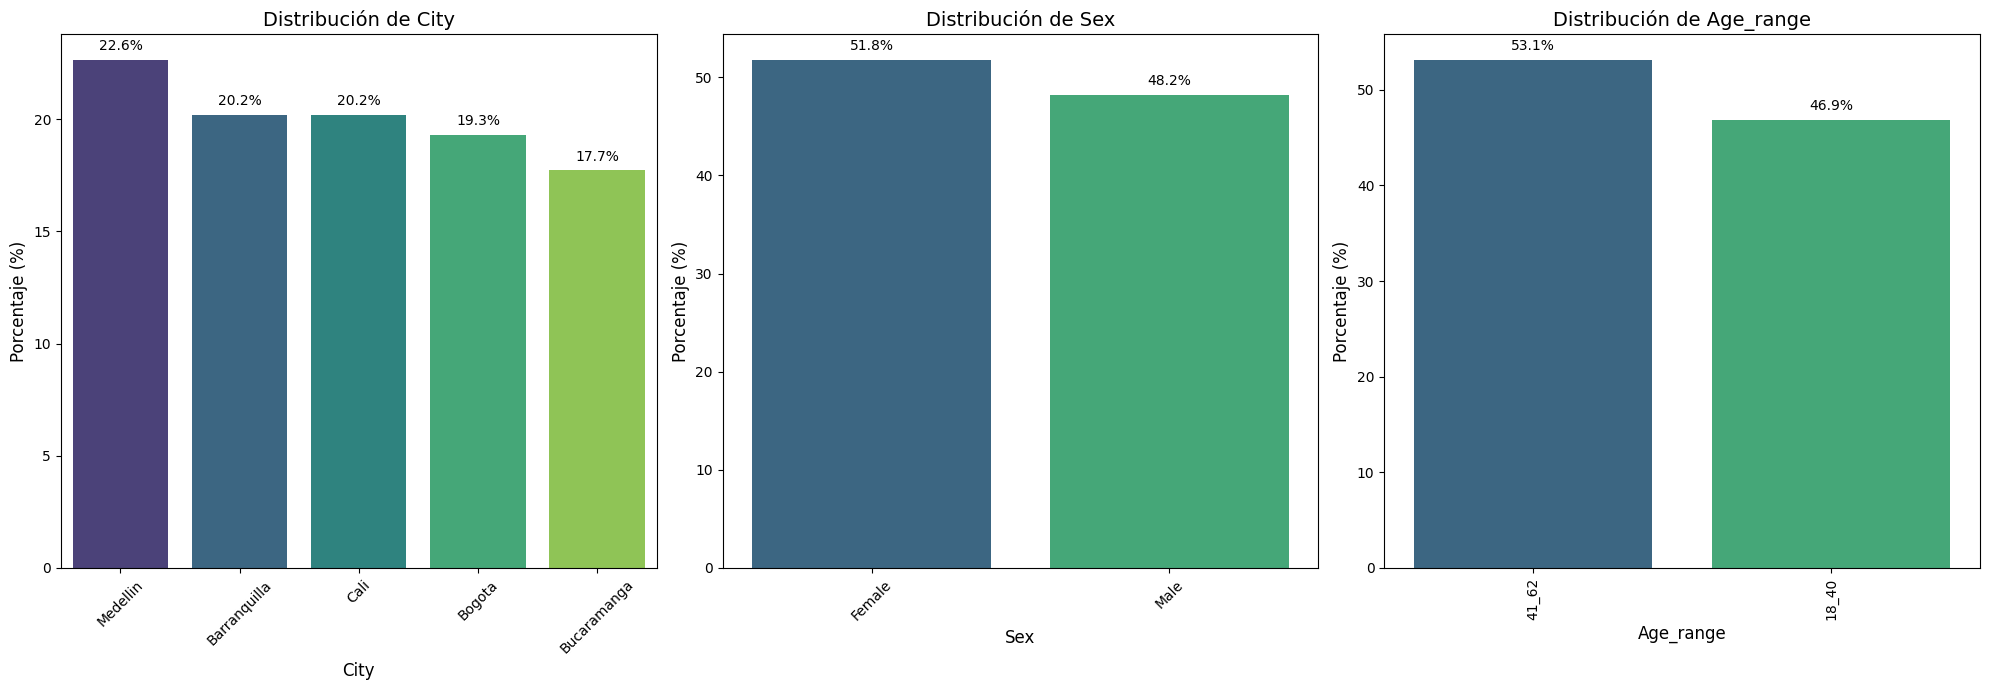

In [10]:
import matplotlib.pyplot as plt

columns_to_plot = ["city", "sex", "age_range"]
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

diff_proportions = {}

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    value_percentages = df_meta[col].value_counts(normalize=True) * 100

    print(value_percentages.index, value_percentages.values)

    diff_proportions[col] = value_percentages.values.max() - value_percentages.values.min()

    sns.barplot(x=value_percentages.index, y=value_percentages.values, ax=ax, palette='viridis')

    ax.set_title(f'Distribución de {col.capitalize()}', fontsize=14)
    ax.set_xlabel(col.capitalize(), fontsize=12)
    ax.set_ylabel('Porcentaje (%)', fontsize=12)

    # Rotate x-axis labels for better readability, especially for 'age'
    if col == 'age_range':
        ax.tick_params(axis='x', rotation=90)
    else:
        ax.tick_params(axis='x', rotation=45)

    # Add percentage labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

In [11]:
for col, range_val in diff_proportions.items():
    print(f"Diferencia de proporciones de '{col}': {range_val}%")

Diferencia de proporciones de 'city': 4.932735426008964%
Diferencia de proporciones de 'sex': 3.587443946188351%
Diferencia de proporciones de 'age_range': 6.278026905829591%


In [12]:
columns_to_convert = [
    'LDL',
    'hsCRP',
    'glycosylated_hg',
    'adiponectin',
    'insulin',
    'HOMA_IR',
    'bmi',
    'body_fat',
    'waist'
]

# Add columns starting with 'per_' to the list
for col in df_meta.columns:
    if col.startswith('per_'):
        columns_to_convert.append(col)

# Convert columns to float, handling comma decimals and non-numeric values
for col in columns_to_convert:
    if col in df_meta.columns:
        df_meta[col] = df_meta[col].astype(str).str.replace(',', '.', regex=False)
        df_meta[col] = pd.to_numeric(df_meta[col], errors='coerce')

# Display the data types of the modified columns to confirm conversion
print("Data types after conversion:")
print(df_meta[columns_to_convert].dtypes)

Data types after conversion:
LDL                        float64
hsCRP                      float64
glycosylated_hg            float64
adiponectin                float64
insulin                    float64
HOMA_IR                    float64
bmi                        float64
body_fat                   float64
waist                      float64
per_protein                float64
per_animal_protein         float64
per_total_fat              float64
per_saturated_fat          float64
per_monoinsaturated_fat    float64
per_polyunsaturated_fat    float64
per_carbohydrates          float64
dtype: object


In [13]:
numeric_cols = df_meta.select_dtypes(include=['number']).columns

outlier_percentages = {}

for col in numeric_cols:
    Q1 = df_meta[col].quantile(0.25)
    Q3 = df_meta[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_meta[(df_meta[col] < lower_bound) | (df_meta[col] > upper_bound)]
    percentage_outliers = (len(outliers) / len(df_meta[col].dropna())) * 100 if len(df_meta[col].dropna()) > 0 else 0
    outlier_percentages[col] = percentage_outliers

print("Percentage of outliers for each numeric column (IQR method):")
for col, percentage in outlier_percentages.items():
    print(f"- {col}: {percentage:.2f}%")

Percentage of outliers for each numeric column (IQR method):
- age: 0.00%
- HDL: 2.47%
- LDL: 1.35%
- cholesterol: 2.02%
- triglycerides: 5.38%
- hsCRP: 5.83%
- glucose: 5.61%
- glycosylated_hg: 4.04%
- adiponectin: 5.61%
- insulin: 5.38%
- HOMA_IR: 6.95%
- systolic_bp: 1.35%
- diastolic_bp: 0.67%
- bmi: 1.12%
- body_fat: 2.47%
- waist: 1.12%
- fiber: 1.79%
- per_protein: 0.90%
- per_animal_protein: 1.79%
- per_total_fat: 0.45%
- per_saturated_fat: 0.45%
- per_monoinsaturated_fat: 0.90%
- per_polyunsaturated_fat: 0.45%
- per_carbohydrates: 0.90%


/tmp/ipython-input-2119396262.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_meta.select_dtypes(include=['number']).columns, rotation=45, ha='right')


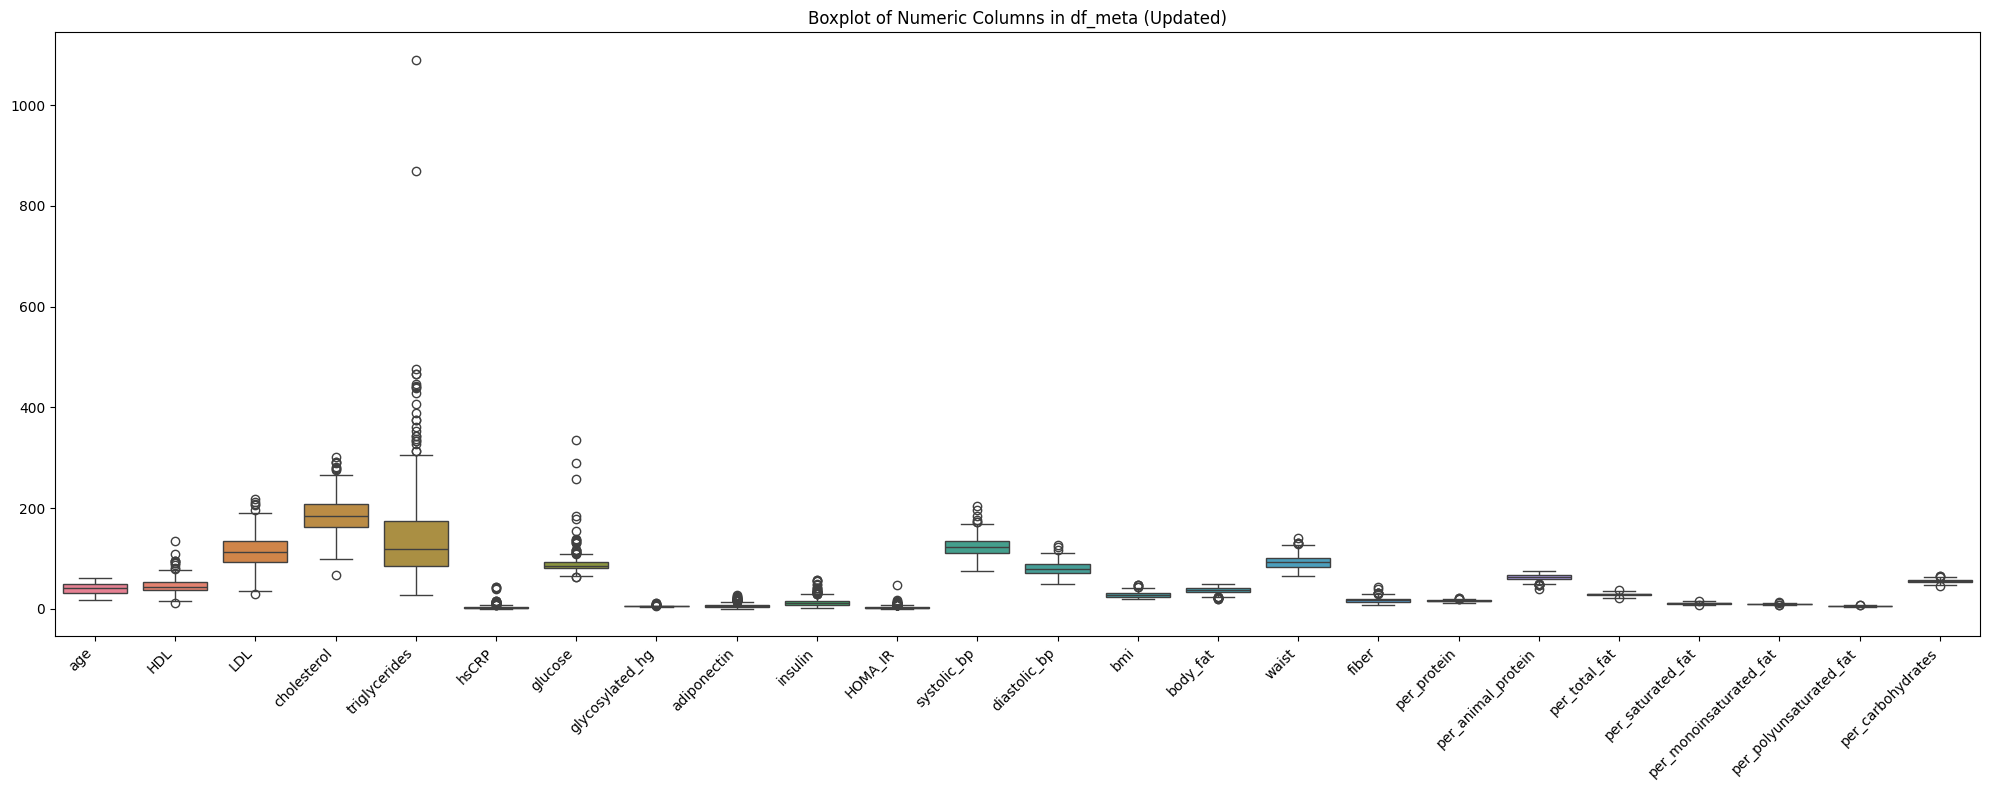

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=df_meta.select_dtypes(include=['number']), orient="v")

# The column_rename dictionary from an earlier cell is not directly applicable
# as the keys don't match the actual column names in df_meta. However, the
# intention is to use short labels for the plot. For this context, I will
# use the existing column names as labels for the boxplot.
# If specific custom labels were desired beyond what was already present,
# a new dictionary mapping df_meta column names to desired labels would be needed.

# Rename the labels if the user wants specific short names for numerical columns
# For now, let's use the actual numeric column names as labels

ax.set_xticklabels(df_meta.select_dtypes(include=['number']).columns, rotation=45, ha='right')
plt.title('Boxplot of Numeric Columns in df_meta (Updated)')
plt.tight_layout()
plt.show()

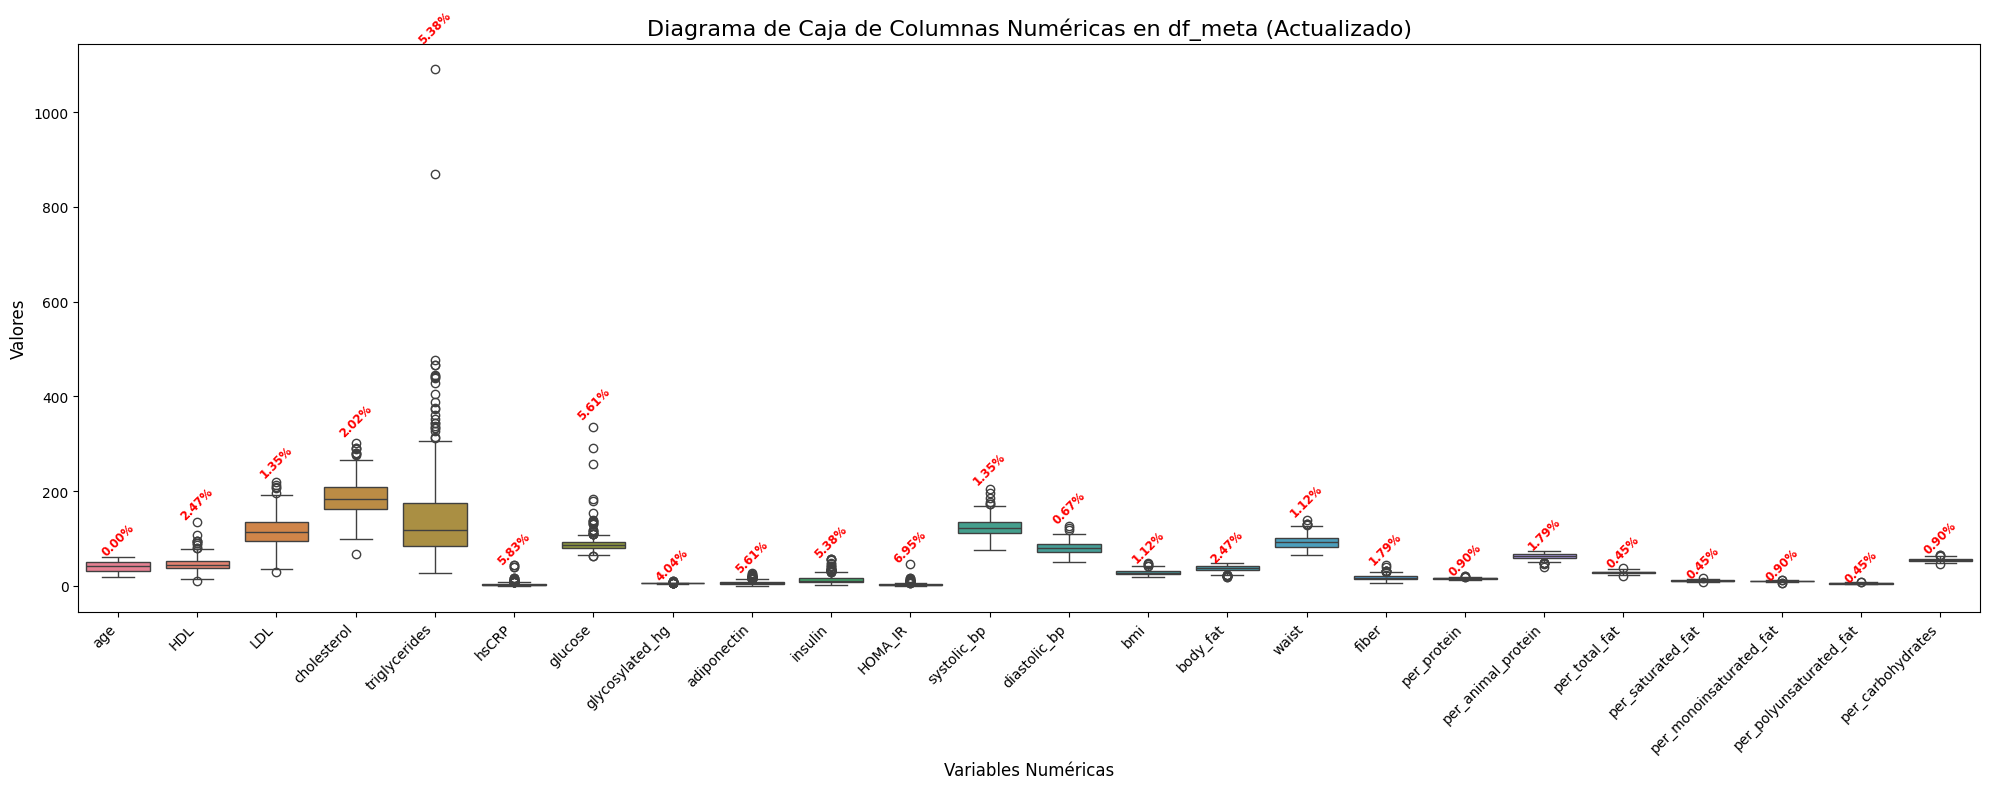

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=df_meta.select_dtypes(include=['number']), orient="v")

# Get the current numeric columns
numeric_columns = df_meta.select_dtypes(include=['number']).columns

# Set the tick locations explicitly to avoid UserWarning
ax.set_xticks(range(len(numeric_columns)))

# Set the tick labels with rotation
ax.set_xticklabels(numeric_columns, rotation=45, ha='right')
plt.title('Diagrama de Caja de Columnas Numéricas en df_meta (Actualizado)', fontsize=16)
plt.xlabel('Variables Numéricas', fontsize=12)
plt.ylabel('Valores', fontsize=12)

# Annotate the boxplot with outlier percentages
for i, col in enumerate(numeric_columns):
    # Re-calculate Q1, Q3, and IQR for each column to ensure consistency and availability of bounds
    Q1 = df_meta[col].quantile(0.25)
    Q3 = df_meta[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_meta[(df_meta[col] < lower_bound) | (df_meta[col] > upper_bound)]
    percentage_outliers = (len(outliers) / len(df_meta[col].dropna())) * 100 if len(df_meta[col].dropna()) > 0 else 0

    # Get the median value for vertical positioning (approximate center for text)
    median_val = df_meta[col].median()

    # Adjust vertical position to place text above the box
    # A small offset is added to place the text slightly above the box/whiskers
    # Max value of the column can also be used as a reference for y-position
    y_pos = df_meta[col].max() # Use the maximum value as a base for text positioning
    if not pd.isna(y_pos):
        ax.text(i, y_pos * 1.05, f'{percentage_outliers:.2f}%',
                horizontalalignment='center', size='small', color='red', weight='semibold', rotation=45)

plt.tight_layout()
plt.show()

### 1.2. Calidad

#### 1.2.1. Completitud

In [16]:
((df_meta.isnull().sum()/df_meta.shape[0])).sort_values(ascending=False)

,0
LDL,0.004484
systolic_bp,0.002242
sex,0.000000
age,0.000000
age_range,0.000000
HDL,0.000000
city,0.000000
triglycerides,0.000000
hsCRP,0.000000
glucose,0.000000


#### 1.2.2. Duplicidad

In [17]:
df_meta.duplicated(keep = False).sum()

np.int64(0)

#### 1.2.3. Validez y consistencia

In [18]:
negative_value_columns = {}

# Get all numeric columns
numeric_cols = df_meta.select_dtypes(include=['number']).columns

for col in numeric_cols:
    # Check if there are any negative values in the column
    if (df_meta[col] < 0).any():
        # Get the count of negative values
        negative_count = (df_meta[col] < 0).sum()
        negative_value_columns[col] = negative_count

if negative_value_columns:
    print("Columnas con valores negativos inconsistentes:")
    for col, count in negative_value_columns.items():
        print(f"- '{col}': {count} valores negativos")
    print("\nEs importante revisar estas columnas.")
else:
    print("No se encontraron columnas numéricas con valores negativos inconsistentes.")

No se encontraron columnas numéricas con valores negativos inconsistentes.


In [19]:
def parse_age_range(age_range_str):
    if isinstance(age_range_str, str) and '_' in age_range_str:
        try:
            start, end = map(int, age_range_str.split('_'))
            return start, end
        except ValueError:
            return None, None
    return None, None

# Apply the function to create temporary min_age and max_age columns
df_meta[['min_age', 'max_age']] = df_meta['age_range'].apply(lambda x: pd.Series(parse_age_range(x)))

# Check for inconsistencies
inconsistent_ages = df_meta[
    (df_meta['age'] < df_meta['min_age']) | (df_meta['age'] > df_meta['max_age'])
]

# Report the findings
if not inconsistent_ages.empty:
    print(f"Hay {len(inconsistent_ages)} registros con inconsistencias:")
    print(inconsistent_ages[['age', 'age_range', 'min_age', 'max_age']])
else:
    print("Todos los valores de 'age' están dentro de los rangos especificados en 'age_range'.")

# Clean up temporary columns
df_meta = df_meta.drop(columns=['min_age', 'max_age'])

Todos los valores de 'age' están dentro de los rangos especificados en 'age_range'.


In [20]:
text_columns = df_meta.select_dtypes(include=['object']).columns

if not text_columns.empty:
    print("Valores únicos para las variables de texto:")
    for col in text_columns:
        print(f"\n- '{col}':")
        unique_values = df_meta[col].unique()
        if len(unique_values) > 50: # Limit output for very long lists of unique values
            print(f"  Hay {len(unique_values)} valores únicos. Mostrando los primeros 50:")
            print(unique_values[:50])
        else:
            print(unique_values)
else:
    print("No se encontraron columnas de tipo texto en df_meta.")

Valores únicos para las variables de texto:

- 'city':
['Medellin' 'Bogota' 'Barranquilla' 'Bucaramanga' 'Cali']

- 'sex':
['Male' 'Female']

- 'age_range':
['18_40' '41_62']

- 'stool_consistency':
['Normal' 'Hard' 'Mushy' 'Diarrheic']

- 'hiden_blood':
['Negative' 'Positive']

- 'bmi_class':
['Overweight' 'Obese' 'Lean']

- 'medicament':
['No' 'Yes']


In [21]:
# Filtrar los valores de HOMA_IR mayores a 3.0
homa_ir_mayores_a_3 = df_meta[df_meta['HOMA_IR'] > 3.0]['HOMA_IR']

if not homa_ir_mayores_a_3.empty:
    print(f"Se encontraron {len(homa_ir_mayores_a_3)} valores de HOMA_IR mayores a 3.0.\n")
    print("Estadísticas descriptivas para HOMA_IR > 3.0:")
    print(homa_ir_mayores_a_3.describe())
else:
    print("No se encontraron valores de HOMA_IR mayores a 3.0.")

Se encontraron 162 valores de HOMA_IR mayores a 3.0.

Estadísticas descriptivas para HOMA_IR > 3.0:
count    162.000000
mean       5.424262
std        4.153885
min        3.007853
25%        3.556995
50%        4.321526
75%        5.582924
max       47.158843
Name: HOMA_IR, dtype: float64


## 2. OTU

### 2.1. Perfilamiento

In [22]:
df_otus.shape

print(f"{df_otus.shape[0]} filas y {df_otus.shape[1]} columnas")

446 filas y 4738 columnas


In [23]:
print(df_otus.sample(n=1))

          Otu00001  Otu00002  Otu00003  Otu00004  Otu00005  Otu00006  \
samples                                                                
MI_235_H        76       984      2429       527       198         0   

          Otu00007  Otu00008  Otu00009  Otu00010  ...  Otu04757  Otu04758  \
samples                                           ...                       
MI_235_H       302       143        85       454  ...         0         0   

          Otu04759  Otu04760  Otu04761  Otu04762  Otu04763  Otu04764  \
samples                                                                
MI_235_H         0         0         0         0         0         0   

          Otu04765  Otu04766  
samples                       
MI_235_H         0         0  

[1 rows x 4738 columns]


In [24]:
df_otus.dtypes

,0
Otu00001,int64
Otu00002,int64
Otu00003,int64
Otu00004,int64
Otu00005,int64
...,...
Otu04762,int64
Otu04763,int64
Otu04764,int64
Otu04765,int64


In [25]:
df_otus.describe()

,Otu00001,Otu00002,Otu00003,Otu00004,Otu00005,Otu00006,Otu00007,Otu00008,Otu00009,Otu00010,...,Otu04757,Otu04758,Otu04759,Otu04760,Otu04761,Otu04762,Otu04763,Otu04764,Otu04765,Otu04766
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,...,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,306.253363,2553.852018,1013.647982,2650.369955,594.374439,2649.448430,1095.168161,1341.795964,916.336323,493.284753,...,0.004484,0.004484,0.004484,0.004484,0.004484,0.004484,0.004484,0.004484,0.004484,0.004484
std,763.650159,5214.170555,1464.807561,6174.591349,819.942460,5975.876753,2028.604698,2556.917196,2652.962196,1319.314990,...,0.094703,0.094703,0.094703,0.094703,0.094703,0.094703,0.094703,0.094703,0.094703,0.066890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.250000,70.000000,123.000000,108.750000,122.250000,14.000000,36.000000,88.250000,8.000000,28.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.500000,740.000000,448.000000,579.000000,285.000000,177.500000,299.000000,352.500000,64.000000,107.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,306.500000,2610.500000,1277.750000,2361.500000,682.500000,1976.500000,1176.500000,1472.750000,515.250000,386.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10508.000000,52572.000000,12490.000000,57564.000000,6180.000000,60711.000000,17004.000000,30938.000000,27200.000000,16041.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


/tmp/ipython-input-2254157786.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_30_otus.index, y=top_30_otus.values, palette='viridis')


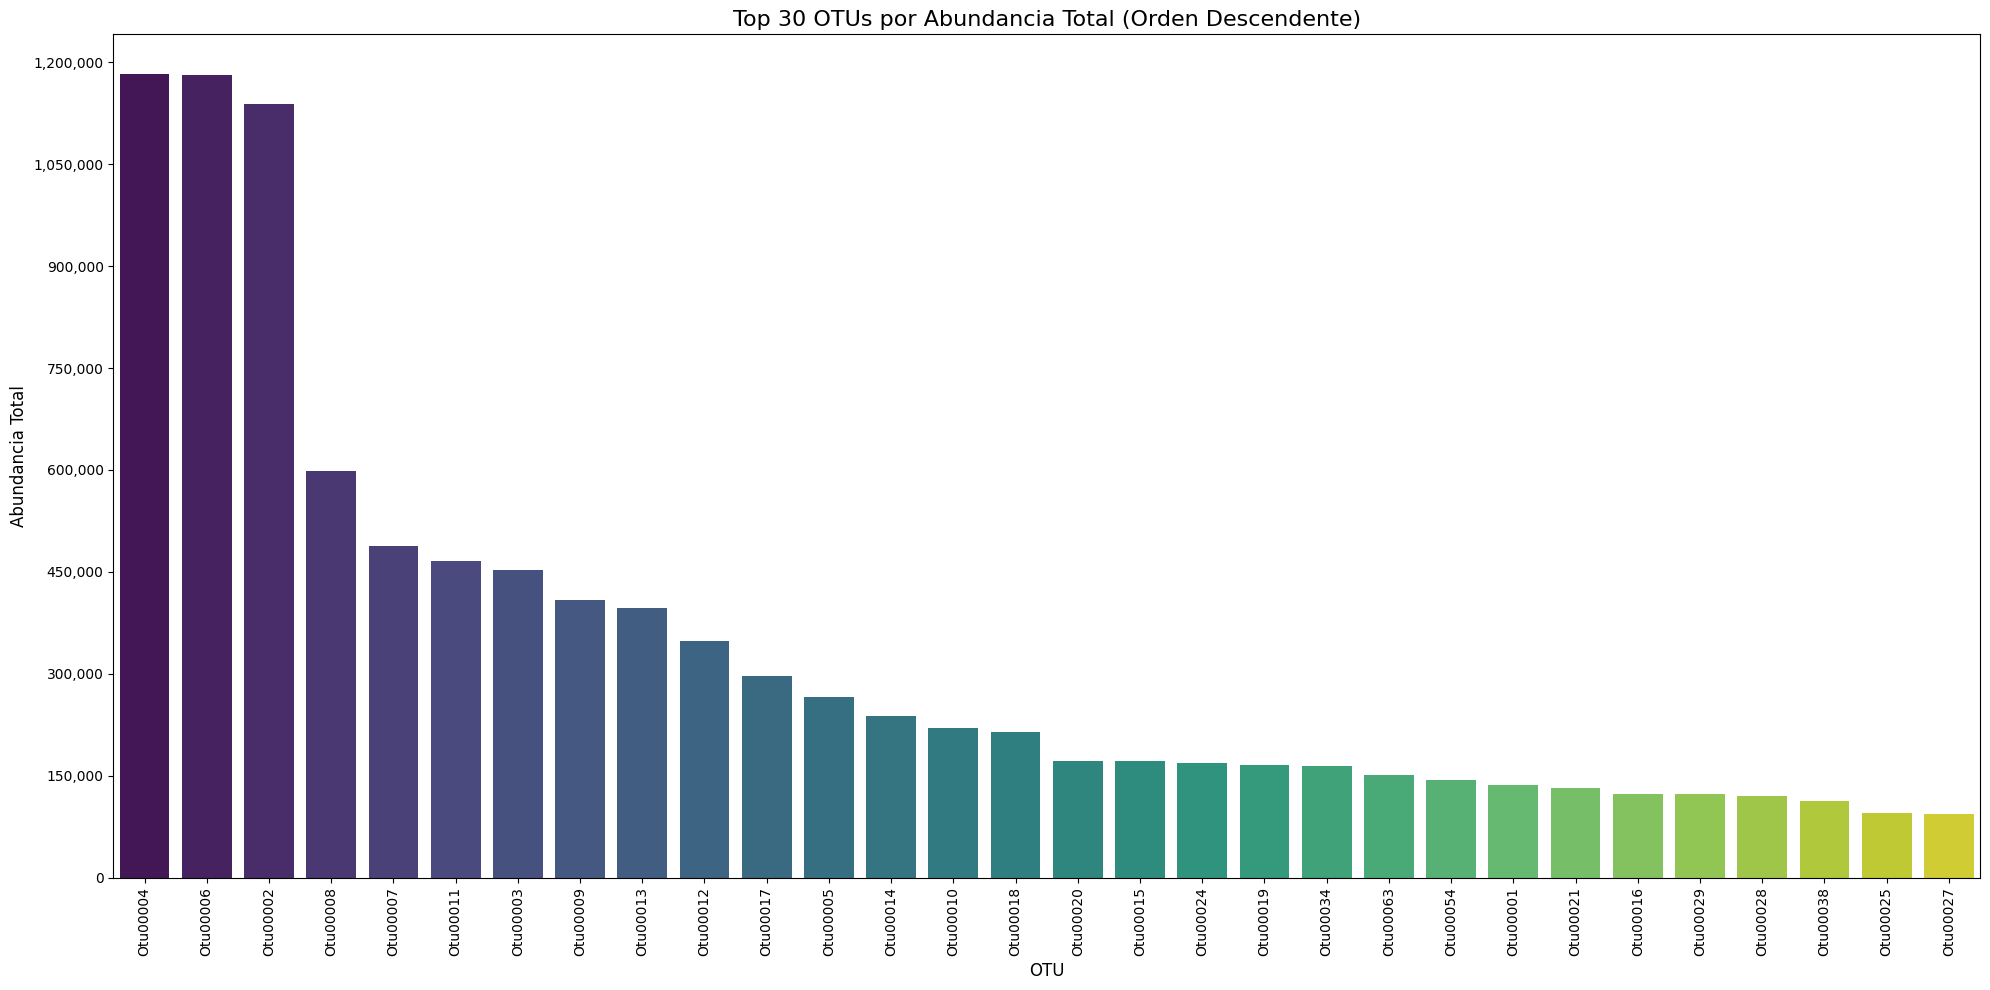

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calculate the total abundance for each OTU (sum of each column)
otu_abundance = df_otus.sum().sort_values(ascending=False)

# Select the top 30 most abundant OTUs
top_30_otus = otu_abundance.head(30)

# Create the bar chart
plt.figure(figsize=(20, 10)) # Increased figure size for better readability with 50 bars
ax = sns.barplot(x=top_30_otus.index, y=top_30_otus.values, palette='viridis')

plt.title('Top 30 OTUs por Abundancia Total (Orden Descendente)', fontsize=16)
plt.xlabel('OTU', fontsize=12)
plt.ylabel('Abundancia Total', fontsize=12)
plt.xticks(rotation=90, ha='center') # Rotate labels to 90 degrees and center them for 30 bars

# Force y-axis major ticks to be integers
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Force y-axis labels to display as integers without decimals
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

/tmp/ipython-input-3702311468.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


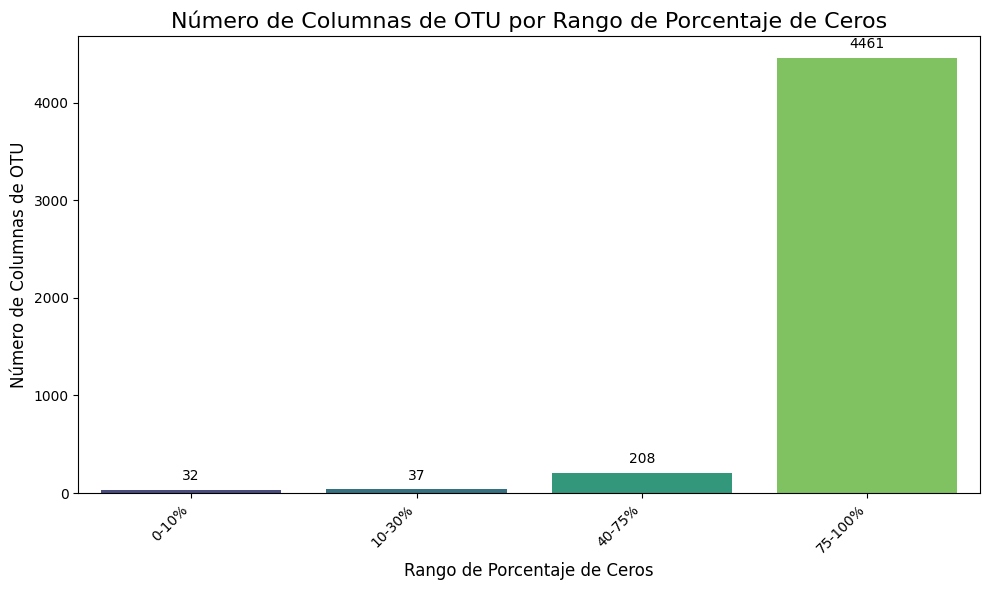

In [27]:
import matplotlib.pyplot as plt

# Calculate the percentage of zeros for each OTU column
zero_percentages = (df_otus == 0).sum() / len(df_otus) * 100

# Define the bins and labels for the percentage ranges
# Using -0.01 to include 0% in the first bin with include_lowest=True
bins = [-0.01, 10, 30, 75, 100]
labels = ['0-10%', '10-30%', '40-75%', '75-100%']

# Categorize OTUs into these ranges
# The 'right=True' means the rightmost bin edge is included (e.g., (10, 30] includes 30)
# 'include_lowest=True' ensures that values equal to the first bin edge (-0.01, effectively 0) are included
zero_percentage_categories = pd.cut(zero_percentages, bins=bins, labels=labels, right=True, include_lowest=True)

# Count the number of OTUs in each category
category_counts = zero_percentage_categories.value_counts().sort_index()

# Reindex to ensure all specified labels are present, even if counts are zero
category_counts = category_counts.reindex(labels, fill_value=0)

if category_counts.empty:
    print("No se encontraron columnas de OTU con valores de porcentaje de cero en los rangos definidos.")
else:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

    plt.title('Número de Columnas de OTU por Rango de Porcentaje de Ceros', fontsize=16)
    plt.xlabel('Rango de Porcentaje de Ceros', fontsize=12)
    plt.ylabel('Número de Columnas de OTU', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Add annotations (number of columns) on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', # Display integer count
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()

### 2.2. Calidad

#### 2.2.1. Completitud

In [28]:
((df_otus.isnull().sum()/df_otus.shape[0])).sort_values(ascending=False)

,0
Otu04766,0.0
Otu00001,0.0
Otu04750,0.0
Otu04749,0.0
Otu04748,0.0
...,...
Otu00007,0.0
Otu00006,0.0
Otu00005,0.0
Otu00004,0.0


#### 2.2.2. Duplicidad

In [29]:
df_otus.duplicated(keep = False).sum()

np.int64(0)

#### 2.2.3. Validez y consistencia

In [30]:
negative_value_columns = {}

for col in df_otus.select_dtypes(include=['number']).columns:
    # Check if there are any negative values in the column
    if (df_otus[col] < 0).any():
        # Get the count of negative values
        negative_count = (df_otus[col] < 0).sum()
        negative_value_columns[col] = negative_count

if negative_value_columns:
    print("Columnas con valores negativos inconsistentes:")
    for col, count in negative_value_columns.items():
        print(f"- '{col}': {count} valores negativos")
    print("\nEs importante revisar estas columnas.")
else:
    print("No se encontraron columnas con valores negativos inconsistentes.")

No se encontraron columnas con valores negativos inconsistentes.


In [31]:
row_sums = df_otus.sum(axis=1)
rows_less_than_1000 = df_otus[row_sums < 1000]

if not rows_less_than_1000.empty:
    print("Filas en las que la suma de valores fue <=1000:")
    print(rows_less_than_1000)
else:
    print("Todo está en orden.")

Todo está en orden.


## 3. Taxonomía

### 3.1. Perfilamiento

In [32]:
df_taxonomy.shape

print(f"{df_taxonomy.shape[0]} filas y {df_taxonomy.shape[1]} columnas")

4738 filas y 2 columnas


In [33]:
pd.set_option('display.max_colwidth', None)

In [34]:
print(df_taxonomy.sample(n=1))

          Size  \
OTU              
Otu02485     1   

                                                                                                      Taxonomy  
OTU                                                                                                             
Otu02485  k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia;unclassified;  


In [35]:
df_taxonomy.dtypes

,0
Size,int64
Taxonomy,object


In [36]:
df_taxonomy.describe()

,Size
count,4.738000e+03
mean,3.140658e+03
std,3.635555e+04
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,5.575000e+01
max,1.182065e+06


/tmp/ipython-input-2886680582.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_30_sizes.index, y=top_30_sizes.values, palette='viridis')


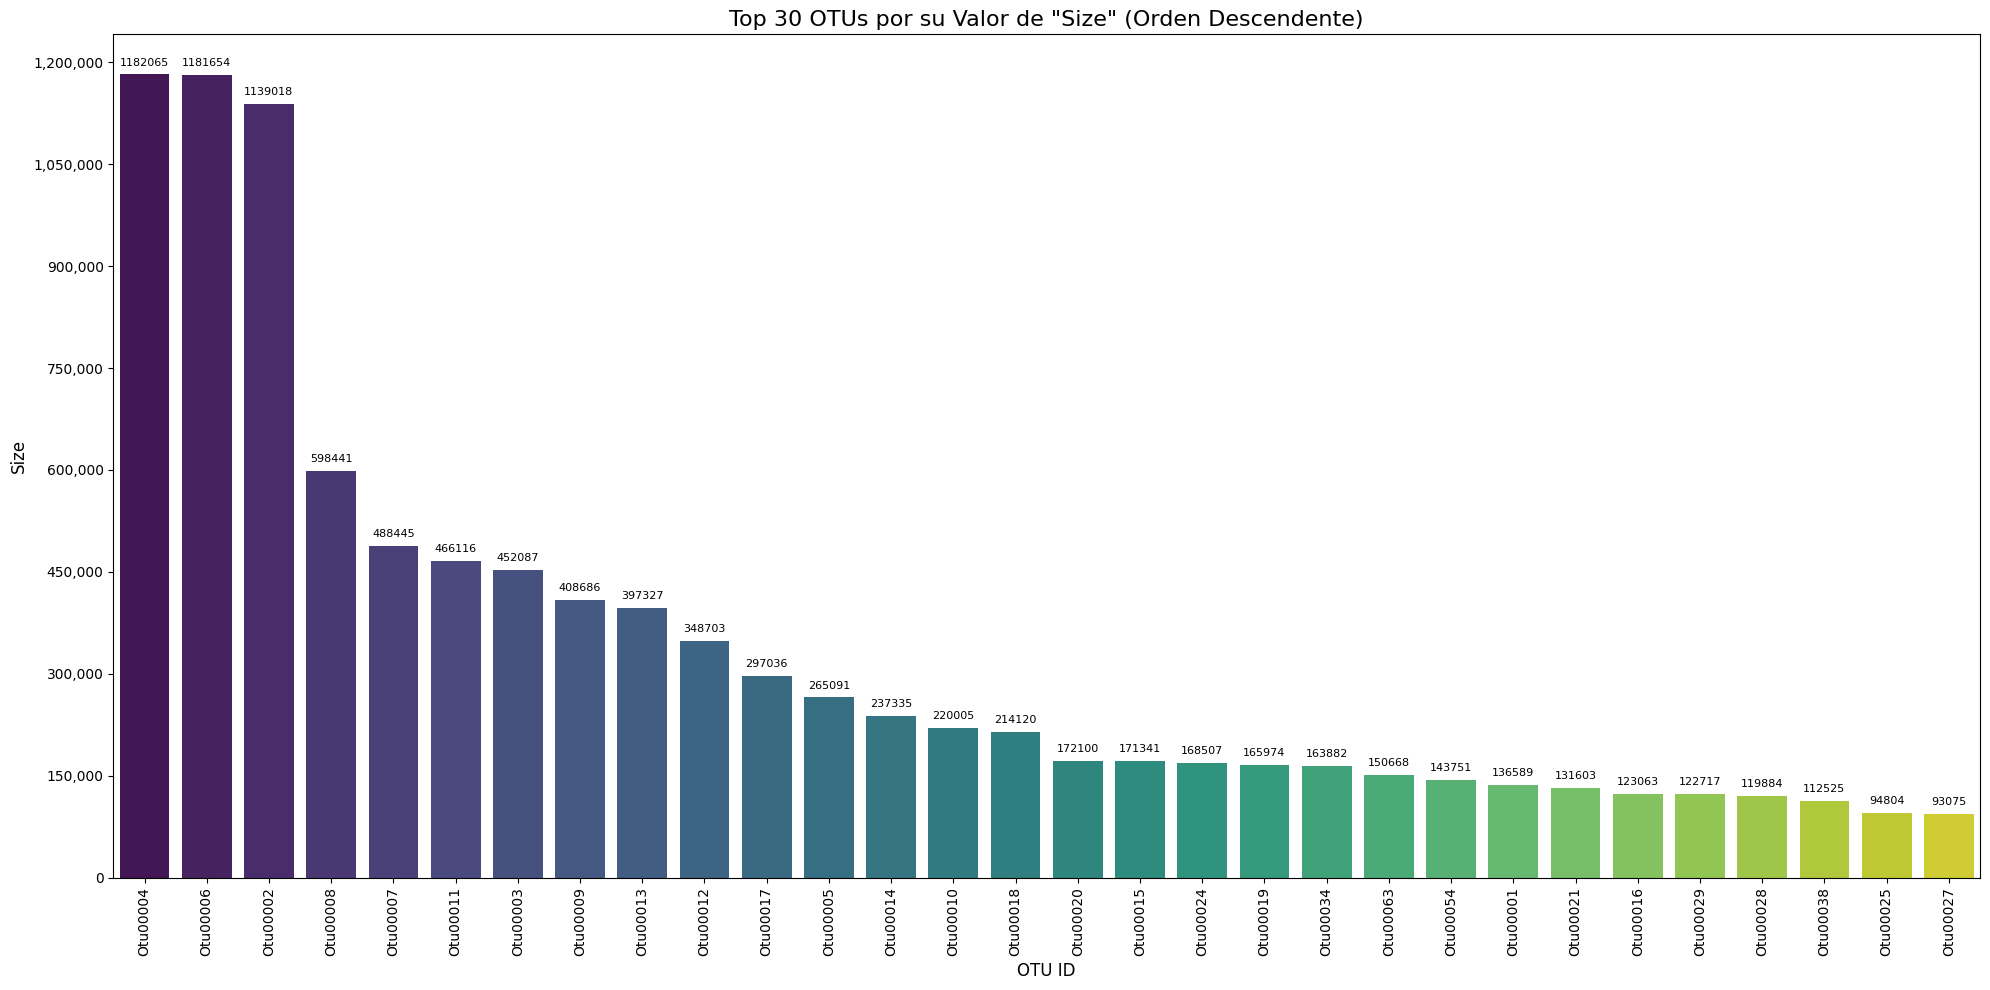

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Get the top 30 largest 'Size' values from df_taxonomy
top_30_sizes = df_taxonomy['Size'].nlargest(30)

# Generate the bar chart
plt.figure(figsize=(20, 10)) # Increased figure size for better readability with 30 bars
ax = sns.barplot(x=top_30_sizes.index, y=top_30_sizes.values, palette='viridis')

plt.title('Top 30 OTUs por su Valor de "Size" (Orden Descendente)', fontsize=16)
plt.xlabel('OTU ID', fontsize=12)
plt.ylabel('Size', fontsize=12)
plt.xticks(rotation=90, ha='center') # Rotate labels to 90 degrees and center them

# Force y-axis major ticks to be integers
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Force y-axis labels to display as integers without decimals
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add numerical labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',  # Display integer values for counts
                (p.get_x() + p.get_width() / 2., height), # x: center of bar, y: top of bar
                ha='center', va='bottom', # Horizontal and vertical alignment
                fontsize=8, color='black',
                xytext=(0, 5), # 5 points vertical offset from the top of the bar
                textcoords='offset points')

plt.tight_layout()
plt.show()

### 3.2. Calidad

#### 3.2.1. Completitud

In [38]:
((df_taxonomy.isnull().sum()/df_taxonomy.shape[0])).sort_values(ascending=False)

,0
Size,0.0
Taxonomy,0.0


#### 3.2.2. Duplicidad

In [39]:
df_taxonomy[df_taxonomy.duplicated(keep="first")]

,Size,Taxonomy
OTU,,
Otu00676,18,k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Bulleidia;s__p-1630-c5;
Otu00683,120,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Defluviitalea;s__saccharophila;
Otu00699,94,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Papillibacter;s__cinnamivorans;
Otu00717,30,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Christensenellaceae;unclassified;unclassified;
Otu00720,57,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Christensenellaceae;unclassified;unclassified;
...,...,...
Otu04758,2,k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;unclassified;unclassified;unclassified;
Otu04759,2,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes;s__indistinctus;
Otu04760,2,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Marvinbryantia;s__formatexigens;


In [40]:
registros_duplicados = df_taxonomy[df_taxonomy.duplicated(keep=False)]
registros_duplicados_ordenados = registros_duplicados.sort_values(by=['Size', 'Taxonomy'])
registros_duplicados_ordenados

,Size,Taxonomy
OTU,,
Otu03262,1,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;unclassified;
Otu03507,1,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;unclassified;
Otu02438,1,k__Bacteria;p__Acidobacteria;c__[Chloracidobacteria];o__RB41;unclassified;unclassified;unclassified;
Otu02439,1,k__Bacteria;p__Acidobacteria;c__[Chloracidobacteria];o__RB41;unclassified;unclassified;unclassified;
Otu03033,1,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae;g__Rothia;s__mucilaginosa;
...,...,...
Otu01176,73,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__[Cerasicoccales];f__[Cerasicoccaceae];unclassified;unclassified;
Otu00621,94,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Papillibacter;s__cinnamivorans;
Otu00699,94,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Papillibacter;s__cinnamivorans;


#### 3.2.3. Validez y consistencia

In [41]:
negative_value_columns = {}

for col in df_taxonomy.select_dtypes(include=['number']).columns:
    # Check if there are any negative values in the column
    if (df_taxonomy[col] < 0).any():
        # Get the count of negative values
        negative_count = (df_taxonomy[col] < 0).sum()
        negative_value_columns[col] = negative_count

if negative_value_columns:
    print("Columnas con valores negativos inconsistentes:")
    for col, count in negative_value_columns.items():
        print(f"- '{col}': {count} valores negativos")
    print("\nEs importante revisar estas columnas.")
else:
    print("No se encontraron columnas numéricas con valores negativos inconsistentes.")

No se encontraron columnas numéricas con valores negativos inconsistentes.


In [42]:
otu_sums = df_otus.sum()
size_column = df_taxonomy['Size']

# Generate a DataFrame to compare the two series
comparison_df = pd.DataFrame({
    'Sum_df_otus': otu_sums,
    'Size_df_taxonomy': size_column
})

# Check for mismatches
mismatches = comparison_df[comparison_df['Sum_df_otus'] != comparison_df['Size_df_taxonomy']]

print("Verificación de la consistencia entre 'Size' de df_taxonomy y la suma de OTU de df_otus:")
if mismatches.empty:
    print("\n¡Todos los valores coinciden")
else:
    print(f"\nSe encontraron {len(mismatches)} OTU con discrepancias:")
    print(mismatches.head())
    print("\nEstadísticas de las diferencias:")
    difference = comparison_df['Sum_df_otus'] - comparison_df['Size_df_taxonomy']
    print(difference.describe())

# Optionally, display a small sample of the comparison for context
print("\nEjemplo de comparación (primeras 5 filas):")
print(comparison_df.head())

Verificación de la consistencia entre 'Size' de df_taxonomy y la suma de OTU de df_otus:

¡Todos los valores coinciden

Ejemplo de comparación (primeras 5 filas):
          Sum_df_otus  Size_df_taxonomy
Otu00001       136589            136589
Otu00002      1139018           1139018
Otu00003       452087            452087
Otu00004      1182065           1182065
Otu00005       265091            265091


In [43]:
def validate_taxonomy_format(taxonomy_string):
    if not isinstance(taxonomy_string, str):
        return False, f"No es una cadena: {type(taxonomy_string).__name__}"

    # Expected prefixes for each taxonomic level
    expected_prefixes = ['k__', 'p__', 'c__', 'o__', 'f__', 'g__', 's__']

    # Strip any trailing semicolons before splitting to avoid empty levels at the end
    cleaned_taxonomy_string = taxonomy_string.rstrip(';')

    # Split the string by semicolon
    levels = cleaned_taxonomy_string.split(';')

    # Check if the number of levels matches the expected number (Kingdom to Species)
    # Some entries might have fewer levels, so we'll check up to the existing levels
    if len(levels) > len(expected_prefixes):
        return False, f"Demasiados niveles taxonómicos: {len(levels)}"

    for i, level_entry in enumerate(levels):
        # If the level is 'unclassified', it's considered valid regardless of prefix
        if level_entry == 'unclassified':
            continue

        if i < len(expected_prefixes):
            expected_prefix = expected_prefixes[i]
            if not level_entry.startswith(expected_prefix):
                return False, f"Nivel {i+1} no comienza con '{expected_prefix}': {level_entry}"
        else:
            # This case means there's a level beyond 's__', which is unexpected
            return False, f"Nivel inesperado: {level_entry}"

    return True, "Formato Válido"

# Apply the validation function to the 'Taxonomy' column
validation_results = df_taxonomy['Taxonomy'].apply(validate_taxonomy_format)

# Separate valid and invalid entries
valid_entries_count = validation_results.apply(lambda x: x[0]).sum()
invalid_entries_details = validation_results[validation_results.apply(lambda x: not x[0])]

print(f"Total de entradas en la columna 'Taxonomy': {len(df_taxonomy)}")
print(f"Entradas con formato válido: {valid_entries_count}")
print(f"Entradas con formato inválido: {len(invalid_entries_details)}")

if not invalid_entries_details.empty:
    print("\nEjemplos de entradas con formato inválido (primeros 5 si hay muchos):")
    for otu_id, (is_valid, reason) in invalid_entries_details.head(5).items():
        print(f"- OTU: {otu_id}, Razón: {reason}, Valor: '{df_taxonomy.loc[otu_id, 'Taxonomy']}'")
else:
    print("\nTodas las entradas siguen la estructura de niveles taxonómicos esperada.")

Total de entradas en la columna 'Taxonomy': 4738
Entradas con formato válido: 4738
Entradas con formato inválido: 0

Todas las entradas siguen la estructura de niveles taxonómicos esperada.
